# 01. Introduction & Search Algorithms | مقدمة الدورة و خوارزميات البحث

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course 02, Unit 1** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# 01. Introduction & Search Algorithms | مقدمة الدورة و خوارزميات البحث

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Python Essentials - Part 1 (Basics)**: Variables, data types, lists, dictionaries
- ✅ **Python Essentials - Part 2 (Intermediate)**: Functions, classes, modules
- ✅ **📓 Notebook 0: Python Libraries for AI** - NumPy, Matplotlib, Collections, heapq
- ✅ **Basic Math**: Understanding graphs (nodes and edges)

**If you haven't completed these**, you might struggle with:
- Understanding library imports (NumPy, Matplotlib)
- Using collections.deque and heapq
- Understanding graph representation
- Writing Python classes
- Understanding algorithm logic

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIRST notebook** - it's the foundation for everything else!

**Builds on**: 
- Python basics (from Edube courses)
- 📓 **Notebook 0: Python Libraries for AI** - Uses NumPy, Matplotlib, Collections, heapq

**Leads to**: 
- 📓 Notebook 2: Knowledge Representation (uses graph concepts)
- 📓 Notebook 4: Optimization Techniques (uses search concepts)
- 📓 Notebook 5: AI Learning Models (uses algorithm concepts)

**Why this order?**
1. Search algorithms introduce **graph concepts** (needed for knowledge graphs)
2. Search algorithms teach **problem-solving strategies** (needed for all AI)
3. Search algorithms show **before/after comparisons** (shows how AI improves things)

**📚 Related Content:**
- **Course 01, Unit 2**: For a simpler introduction to BFS with basic examples, see `Course 01/unit2-search-algorithms/examples/01_bfs_algorithm.ipynb`
- **Why both exist**: Course 01 provides **simple examples** for beginners. This Course 02 notebook provides **comprehensive coverage** with detailed theory, multiple algorithms (BFS, DFS, A*), visualizations, and connections to other AI concepts.
- **📖 Course Navigation**: For a complete guide to navigating between courses and understanding duplications, see `COURSE_MAP.md` in the root directory.

---

## The Story: Finding Your Way | القصة: إيجاد الطريق

Imagine you're a robot in a maze, trying to find the exit. **Before** using search algorithms, you wander randomly, maybe finding it by luck. **After** learning search algorithms, you systematically explore all possibilities and always find the optimal path!

---

## Why Python for AI? | لماذا بايثون للذكاء الاصطناعي؟

Python's clear syntax makes AI concepts accessible:
- **Readability**: Code reads like natural language
- **Rich Ecosystem**: Libraries like NumPy, Pandas, Scikit-learn
- **Flexibility**: From simple algorithms to complex neural networks

## Learning Objectives | أهداف التعلم
1. Understand Python basics for AI
2. Implement search algorithms (BFS, DFS, A*)
3. Visualize algorithms in action
4. See before/after comparisons
5. Understand how algorithms build on each other

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**Before**: We have a graph (network) of connected nodes. We need to find a path from start to goal.

**After**: We'll see how different search algorithms explore this graph differently!

**Common Student Questions:**
- **Q: What's the difference between BFS, DFS, and A*?**
  - Answer: BFS = level-by-level (queue), DFS = deep-first (stack), A* = smart search (heuristic)
  - BFS: Explores all neighbors before going deeper → finds shortest path
  - DFS: Goes as deep as possible → uses less memory
  - A*: Uses heuristic to guide search → faster, finds optimal path
- **Q: Why do we need different search algorithms?**
  - Answer: Different problems need different strategies
  - Shortest path? → BFS (unweighted) or A* (weighted)
  - Any path? → DFS (faster, less memory)
  - Optimal path with guidance? → A* (uses heuristic)
  - Each algorithm has trade-offs (speed vs memory vs optimality)
- **Q: What is a graph in AI?**
  - Answer: Graph = nodes (points) connected by edges (lines)
  - Nodes = states/positions, Edges = possible moves/connections
  - Example: Map (cities = nodes, roads = edges), Game (positions = nodes, moves = edges)
  - Search algorithms find paths through graphs

In [1]:
# Step 1: Import necessary libraries
# These libraries help us with data structures and visualization
from collections import deque  # For efficient queue operations (FIFO - First In First Out)
import heapq  # For priority queues (used in A* algorithm)
import matplotlib.pyplot as plt  # For creating visualizations
import matplotlib.patches as mpatches  # For drawing shapes
import numpy as np  # For numerical operations

print("✅ Libraries imported successfully!")
print("\n📚 What each library does:")
print("   - collections.deque: Fast queue/stack operations")
print("   - heapq: Priority queue for A* algorithm")
print("   - matplotlib: Create beautiful graphs and visualizations")
print("   - numpy: Fast numerical computations")

✅ Libraries imported successfully!

📚 What each library does:
   - collections.deque: Fast queue/stack operations
   - heapq: Priority queue for A* algorithm
   - matplotlib: Create beautiful graphs and visualizations
   - numpy: Fast numerical computations


In [2]:
# Step 2: Define our problem - a simple graph
# Think of this as a map: each letter is a location, the list shows where you can go from there

# BEFORE: Just a dictionary definition
graph = {
    'A': ['B', 'C'],  # From A, you can go to B or C
    'B': ['D', 'E'],  # From B, you can go to D or E
    'C': ['F'],       # From C, you can go to F
    'D': [],          # D is a dead end (no connections)
    'E': ['G'],       # From E, you can go to G
    'F': [],          # F is a dead end
    'G': []           # G is our goal!
}

print("🗺️  Our Graph (Map):")
print("   Start: A")
print("   Goal: G")
print("\n📍 Connections:")
for node, neighbors in graph.items():
    if neighbors:
        print(f"   {node} -> {', '.join(neighbors)}")
    else:
        print(f"   {node} -> [end]")

🗺️  Our Graph (Map):
   Start: A
   Goal: G

📍 Connections:
   A -> B, C
   B -> D, E
   C -> F
   D -> [end]
   E -> G
   F -> [end]
   G -> [end]


📊 Visualizing the graph structure...


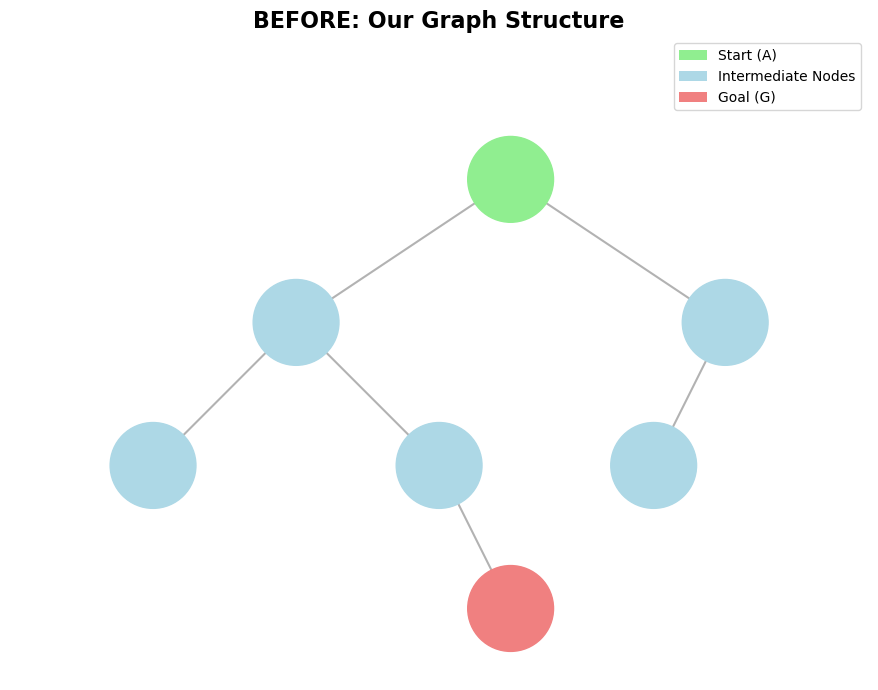


✅ Graph visualized! Now we can see the connections.


In [3]:
# Step 3: Visualize the graph BEFORE we start searching
# This shows us what we're working with

def visualize_graph(graph, title="Graph Structure"):
    """
    Visualize the graph structure.
    This function draws nodes (circles) and edges (lines connecting them).
    """
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Define positions for each node (where to draw them on the plot)
    # Using a tree-like layout
    positions = {
        'A': (3, 3),   # Top center
        'B': (1.5, 2), # Left branch
        'C': (4.5, 2), # Right branch
        'D': (0.5, 1), # Left leaf
        'E': (2.5, 1), # Middle left
        'F': (4, 1),   # Middle right
        'G': (3, 0)    # Bottom (goal)
    }
    
    # Draw edges (connections) first, so they appear behind nodes
    for node, neighbors in graph.items():
        x1, y1 = positions[node]
        for neighbor in neighbors:
            x2, y2 = positions[neighbor]
            # Draw a gray arrow from node to neighbor
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                       arrowprops=dict(arrowstyle='->', color='gray', lw=1.5, alpha=0.6))
    
    # Draw nodes (locations)
    for node, (x, y) in positions.items():
        # Color the start and goal differently
        color = 'lightgreen' if node == 'A' else ('lightcoral' if node == 'G' else 'lightblue')
        # Draw circle
        circle = plt.Circle((x, y), 0.3, color=color, zorder=5)
        ax.add_patch(circle)
        # Add label
        ax.text(x, y, node, ha='center', va='center', fontsize=14, fontweight='bold')
    
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=16, fontweight='bold')
    
    # Add legend
    legend_elements = [
        mpatches.Patch(facecolor='lightgreen', label='Start (A)'),
        mpatches.Patch(facecolor='lightblue', label='Intermediate Nodes'),
        mpatches.Patch(facecolor='lightcoral', label='Goal (G)')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

print("📊 Visualizing the graph structure...")
visualize_graph(graph, "BEFORE: Our Graph Structure")
print("\n✅ Graph visualized! Now we can see the connections.")

## Part 2: Breadth-First Search (BFS) | البحث بالعرض أولاً

### 📚 Prerequisites (What You Need First)
- ✅ **Graph representation** (from Part 1) - Understanding how graphs work
- ✅ **Python basics** - Queues, sets, lists

### 🔗 Relationship: What This Builds On
This is the **FIRST** search algorithm we learn - it's the foundation for others!
- Builds on: Graph representation
- Comes BEFORE: DFS, A*, Dijkstra (all build on BFS concepts)

### 📖 The Story
BFS explores level by level, like ripples in a pond. It guarantees finding the SHORTEST path.

**Before BFS**: We don't know how to systematically explore.
**After BFS**: We explore all nodes at distance 1, then distance 2, etc., until we find the goal!

In [4]:
def bfs_with_visualization(graph, start, goal):
    """
    Breadth-First Search with step-by-step visualization.
    
    HOW IT WORKS:
    1. Start at the start node
    2. Explore all neighbors first (level 1)
    3. Then explore neighbors of those neighbors (level 2)
    4. Continue level by level until goal is found
    
    This guarantees the SHORTEST path (in terms of number of steps)!
    """
    # BEFORE: Initialize empty structures
    queue = deque([(start, [start])])  # Queue: Initialize with start node and its path - deque is efficient for FIFO operations (First In First Out)
    # We use deque because it's efficient for queue operations (FIFO)
    visited = set()  # Keep track of nodes: Set to store visited nodes (set is fast for checking membership - O(1) lookups)
    exploration_order = []  # Track exploration order: List to remember order we visited nodes (for visualization later)
    
    print(f"🔍 Starting BFS from {start} to {goal}...")  # Start message: Show which nodes we're searching between
    print(f"📋 Initial queue: {list(queue)}")  # Show initial state: Display queue contents (should contain start node)
    print(f"📋 Visited: {list(visited)}")  # Show visited: Display visited set (should be empty initially)
    print()
    
    step = 0  # Step counter: Track which iteration we're on (for debugging/visualization)
    while queue:  # Main loop: Continue while queue has nodes to explore (queue empty = searched everywhere, no path found)
        step += 1  # Increment step: Count this iteration (step 1, 2, 3, etc.)
        # Remove node from FRONT of queue (FIFO - First In First Out)
        current, path = queue.popleft()  # Get next node: Remove and return node from left end of queue (FIFO - oldest node first), also get path to reach it
        
        print(f"Step {step}: Processing node '{current}'")  # Show current step: Display which node we're exploring
        print(f"   Path so far: {' -> '.join(path)}")  # Show path: Display path taken to reach current node (joins path list with ' -> ')
        
        # Check if we found the goal!
        if current == goal:  # Goal check: Did we reach the target node?
            print(f"\n🎉 SUCCESS! Found goal '{goal}'!")  # Success message: We found the goal!
            print(f"✅ Final path: {' -> '.join(path)}")  # Show solution: Display complete path from start to goal
            print(f"📊 Path length: {len(path) - 1} steps")  # Show path length: Display number of steps (path length - 1 because path has nodes, steps are edges between nodes)
            exploration_order.append(current)  # Add to exploration: Include goal in exploration order (for visualization)
            return path, exploration_order  # Return solution: Return path and exploration order (exit function - we're done!)
        
        # Mark current node as visited (so we don't visit it again)
        if current not in visited:  # Check if unvisited: Avoid revisiting nodes (would create cycles or infinite loops!)
            visited.add(current)  # Mark as visited: Add current node to visited set (so we don't visit it again)
            exploration_order.append(current)  # Track exploration: Add current node to exploration order (for visualization)
            
            # Add all neighbors to the END of the queue
            neighbors = graph.get(current, [])  # Get all neighbors: Get list of nodes connected to current node (empty list if no neighbors)
            print(f"   Exploring neighbors: {neighbors}")  # Show which neighbors we're exploring
            
            for neighbor in neighbors:  # Loop through each neighbor: Check each node connected to current node
                if neighbor not in visited:  # Check if not already visited: Avoid revisiting nodes (would create cycles!)
                    # Add neighbor with path to reach it
                    queue.append((neighbor, path + [neighbor]))  # Add to queue: Append neighbor with path to reach it (path + [neighbor] creates new path)
                    print(f"      Added '{neighbor}' to queue")  # Show which neighbor was added
            
            print(f"   Queue now: {[(n, len(p)) for n, p in queue]}")  # Show queue state: Display nodes in queue with their path lengths (for debugging)
            print(f"   Visited: {sorted(visited)}")  # Show visited nodes: Display all nodes we've already explored (sorted for readability)
            print()
    
    print("❌ Goal not found!")
    return None, exploration_order

# Run BFS
bfs_path, bfs_order = bfs_with_visualization(graph, 'A', 'G')
print(f"\n📈 Exploration order: {' -> '.join(bfs_order)}")

🔍 Starting BFS from A to G...
📋 Initial queue: [('A', ['A'])]
📋 Visited: []

Step 1: Processing node 'A'
   Path so far: A
   Exploring neighbors: ['B', 'C']
      Added 'B' to queue
      Added 'C' to queue
   Queue now: [('B', 2), ('C', 2)]
   Visited: ['A']

Step 2: Processing node 'B'
   Path so far: A -> B
   Exploring neighbors: ['D', 'E']
      Added 'D' to queue
      Added 'E' to queue
   Queue now: [('C', 2), ('D', 3), ('E', 3)]
   Visited: ['A', 'B']

Step 3: Processing node 'C'
   Path so far: A -> C
   Exploring neighbors: ['F']
      Added 'F' to queue
   Queue now: [('D', 3), ('E', 3), ('F', 3)]
   Visited: ['A', 'B', 'C']

Step 4: Processing node 'D'
   Path so far: A -> B -> D
   Exploring neighbors: []
   Queue now: [('E', 3), ('F', 3)]
   Visited: ['A', 'B', 'C', 'D']

Step 5: Processing node 'E'
   Path so far: A -> B -> E
   Exploring neighbors: ['G']
      Added 'G' to queue
   Queue now: [('F', 3), ('G', 4)]
   Visited: ['A', 'B', 'C', 'D', 'E']

Step 6: Processi

📊 Visualizing BFS result...


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60750/3900281624.py:47: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), 0.3, color=color, edgecolor='black', lw=2, zorder=5)  # Draw node: Create circle at (x, y), radius 0.3, colored, black border


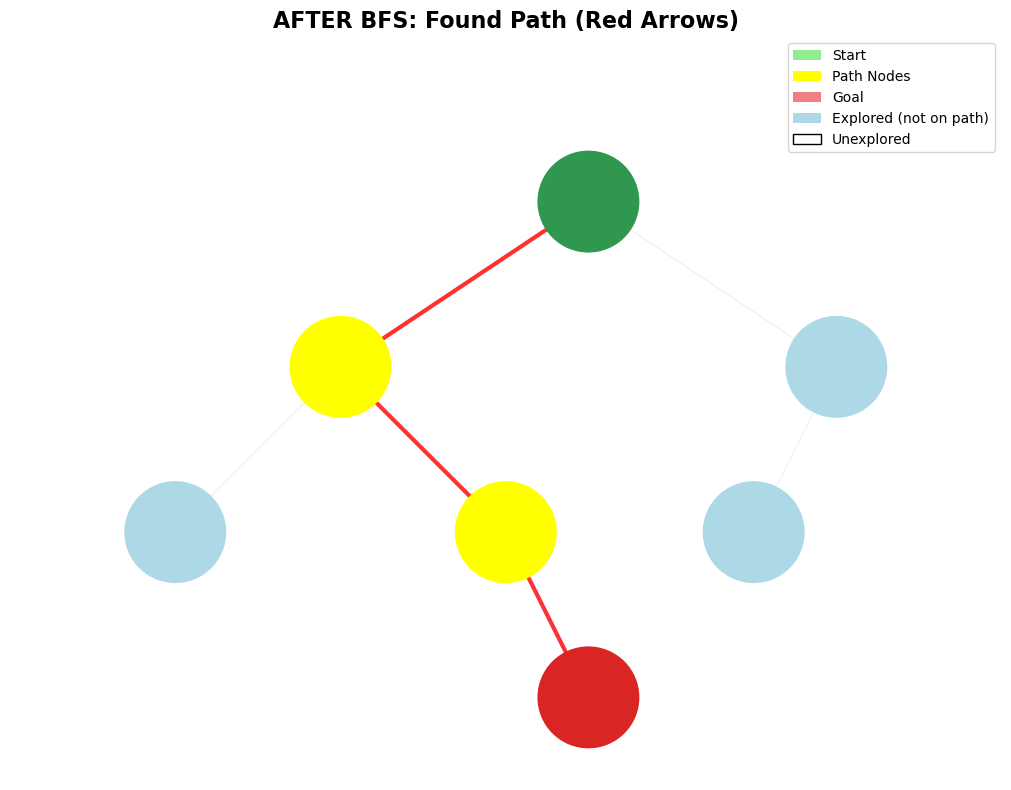

In [5]:
# Visualize BFS exploration
# This shows BEFORE (unexplored) vs AFTER (explored) nodes

def visualize_bfs_path(graph, path, exploration_order):
    """
    Visualize the path found by BFS.
    
    ⏰ WHEN to use: After BFS completes - see the path it found and which nodes were explored
    💡 WHY use: Visual understanding helps verify algorithm works correctly, see exploration order
    """
    fig, ax = plt.subplots(figsize=(12, 8))  # Create figure: Set size to 12 inches wide, 8 inches tall
    
    positions = {  # Define node positions: Fixed coordinates for each node (for consistent visualization)
        'A': (3, 3), 'B': (1.5, 2), 'C': (4.5, 2),  # Top row: A at center, B left, C right
        'D': (0.5, 1), 'E': (2.5, 1), 'F': (4, 1), 'G': (3, 0)  # Bottom rows: D, E, F, G at different levels
    }
    
    # Draw all edges in light gray (the full graph)
    for node, neighbors in graph.items():  # Loop through all nodes: Iterate over every node in graph
        x1, y1 = positions[node]  # Get node position: Get (x, y) coordinates for current node
        for neighbor in neighbors:  # Loop through neighbors: Iterate over each neighbor of current node
            x2, y2 = positions[neighbor]  # Get neighbor position: Get (x, y) coordinates for neighbor node
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),  # Draw edge: Draw arrow from node to neighbor
                       arrowprops=dict(arrowstyle='->', color='lightgray', lw=1, alpha=0.3))  # Edge style: Light gray arrow, thin, semi-transparent
    
    # Highlight the path found by BFS in RED
    if path:  # Check if path exists: Only draw path if BFS found a solution
        for i in range(len(path) - 1):  # Loop through path: Iterate over consecutive pairs in path
            x1, y1 = positions[path[i]]  # Get start position: Get coordinates of current node in path
            x2, y2 = positions[path[i+1]]  # Get end position: Get coordinates of next node in path
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),  # Draw path edge: Draw arrow showing path from current to next node
                       arrowprops=dict(arrowstyle='->', color='red', lw=3, alpha=0.8))  # Path style: Red arrow, thick, opaque (stands out!)
    
    # Color nodes based on their status
    for node, (x, y) in positions.items():  # Loop through all nodes: Iterate over every node to color them appropriately
        if node in path:  # Check if on path: This node is part of the solution path
            # Nodes on the path: green to red gradient
            idx = path.index(node)  # Get position in path: Find where this node appears in path (0 = start, last = goal)
            color = plt.cm.Greens(0.7) if idx == 0 else (plt.cm.Reds(0.7) if idx == len(path)-1 else 'yellow')  # Choose color: Green for start, red for goal, yellow for intermediate
        elif node in exploration_order:  # Check if explored: This node was visited but not on path
            # Explored but not on path: light blue
            color = 'lightblue'  # Color: Light blue (explored but not solution)
        else:
            # Unexplored: white
            color = 'white'  # Color: White (not visited at all)
        
        circle = plt.Circle((x, y), 0.3, color=color, edgecolor='black', lw=2, zorder=5)  # Draw node: Create circle at (x, y), radius 0.3, colored, black border
        ax.add_patch(circle)  # Add to plot: Add circle to the visualization
        ax.text(x, y, node, ha='center', va='center', fontsize=14, fontweight='bold')  # Add label: Place node name in center of circle, bold text
    
    ax.set_xlim(-0.5, 5.5)  # Set x-axis limits: Define horizontal range of plot
    ax.set_ylim(-0.5, 4)  # Set y-axis limits: Define vertical range of plot
    ax.set_aspect('equal')  # Equal aspect ratio: Make circles look circular (not oval)
    ax.axis('off')  # Hide axes: Remove axis lines and labels (cleaner look)
    ax.set_title("AFTER BFS: Found Path (Red Arrows)", fontsize=16, fontweight='bold')  # Add title: Bold text, large font
    
    # Add legend
    legend_elements = [
        mpatches.Patch(facecolor='lightgreen', label='Start'),
        mpatches.Patch(facecolor='yellow', label='Path Nodes'),
        mpatches.Patch(facecolor='lightcoral', label='Goal'),
        mpatches.Patch(facecolor='lightblue', label='Explored (not on path)'),
        mpatches.Patch(facecolor='white', edgecolor='black', label='Unexplored')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    plt.tight_layout()
    plt.show()

print("📊 Visualizing BFS result...")
if bfs_path:
    visualize_bfs_path(graph, bfs_path, bfs_order)

## Part 3: Depth-First Search (DFS) | البحث بالعمق أولاً

### 📚 Prerequisites (What You Need First)
- ✅ **BFS** (from Part 2) - Understanding search algorithms
- ✅ **Graph representation** (from Part 1) - Understanding graphs
- ✅ **Recursion** - Understanding recursive functions

### 🔗 Relationship: What This Builds On
This comes **AFTER** BFS - we compare different exploration strategies!
- Builds on: BFS concepts (queue, visited tracking)
- Comes BEFORE: A* (which combines BFS/DFS ideas)
- Alternative to: BFS (different strategy, same goal)

### 📖 The Story
DFS goes DEEP first, like exploring a cave system. It goes as far as possible before backtracking.

**Before DFS**: We explored level by level (BFS).
**After DFS**: We'll see a completely different exploration pattern - going deep first!

In [6]:
def dfs_with_visualization(graph, start, goal, visited=None, path=None, exploration_order=None):
    """
    Depth-First Search (Recursive) with step-by-step visualization.
    
    HOW IT WORKS:
    1. Start at a node
    2. Go as DEEP as possible along one path
    3. When you hit a dead end, backtrack and try another path
    4. Continue until goal is found
    
    This uses a STACK (Last In First Out) - implemented via recursion!
    """
    # Initialize on first call
    if visited is None:
        visited = set()
        exploration_order = []
        print(f"🔍 Starting DFS from {start} to {goal}...")
        print(f"📋 Strategy: Go DEEP first, backtrack when needed\n")
    
    if path is None:
        path = []
    
    # Mark current node as visited
    visited.add(start)
    exploration_order.append(start)
    path = path + [start]  # Add current node to path
    
    print(f"📍 At node '{start}' | Path: {' -> '.join(path)} | Visited: {sorted(visited)}")
    
    # Check if we found the goal!
    if start == goal:
        print(f"\n🎉 SUCCESS! Found goal '{goal}'!")
        print(f"✅ Final path: {' -> '.join(path)}")
        return path, exploration_order
    
    # Explore neighbors - go DEEP first (take first available neighbor)
    neighbors = graph.get(start, [])
    for neighbor in neighbors:
        if neighbor not in visited:
            print(f"   Going deeper to '{neighbor}'...")
            # Recursively explore this neighbor (going deeper)
            result = dfs_with_visualization(graph, neighbor, goal, visited, path, exploration_order)
            if result and result[0]:  # If we found a path (result[0] is not None), return it
                return result
            else:
                print(f"   Backtracking from '{neighbor}' (no path found)")
    
    # No path found from this node
    return None, exploration_order

# Run DFS
print("=" * 60)
dfs_path, dfs_order = dfs_with_visualization(graph, 'A', 'G')
if dfs_path:
    print(f"\n📈 DFS Exploration order: {' -> '.join(dfs_order)}")
    print(f"📊 Path length: {len(dfs_path) - 1} steps")
else:
    print("❌ Goal not found with DFS!")

🔍 Starting DFS from A to G...
📋 Strategy: Go DEEP first, backtrack when needed

📍 At node 'A' | Path: A | Visited: ['A']
   Going deeper to 'B'...
📍 At node 'B' | Path: A -> B | Visited: ['A', 'B']
   Going deeper to 'D'...
📍 At node 'D' | Path: A -> B -> D | Visited: ['A', 'B', 'D']
   Backtracking from 'D' (no path found)
   Going deeper to 'E'...
📍 At node 'E' | Path: A -> B -> E | Visited: ['A', 'B', 'D', 'E']
   Going deeper to 'G'...
📍 At node 'G' | Path: A -> B -> E -> G | Visited: ['A', 'B', 'D', 'E', 'G']

🎉 SUCCESS! Found goal 'G'!
✅ Final path: A -> B -> E -> G

📈 DFS Exploration order: A -> B -> D -> E -> G
📊 Path length: 3 steps


## Part 4: A* Search Algorithm | خوارزمية البحث A*

### 📚 Prerequisites (What You Need First)
- ✅ **BFS** (from Part 2) - Understanding queue-based search
- ✅ **DFS** (from Part 3) - Understanding search strategies
- ✅ **Priority queues** - Understanding heapq (for smart ordering)

### 🔗 Relationship: What This Builds On
This is an **ADVANCED** algorithm that combines ideas from BFS and DFS!
- Builds on: BFS (queue structure) + DFS (goal-oriented thinking)
- Builds on: Heuristic functions (smart guessing)
- Comes BEFORE: Dijkstra (which extends A* concepts)
- More advanced than: BFS, DFS (adds intelligence)

### 📖 The Story
A* is SMART! It uses a "heuristic" (educated guess) about distance to goal to explore more promising paths first.

**Before A***: We explored blindly (BFS) or deeply (DFS).
**After A***: We use intelligence to guide our search - like using a compass in a maze!

In [7]:
def heuristic(node, goal):
    """
    Heuristic function: estimates distance from node to goal.
    This is our "educated guess" - helps A* make smart decisions.
    
    In this simple case, we use alphabetical distance.
    In real applications (like maps), this would be actual distance.
    """
    # Simple heuristic: how many letters away?
    return abs(ord(node) - ord(goal)) if isinstance(node, str) else 0

def astar_with_visualization(graph, start, goal, edge_costs=None):
    """
    A* Search Algorithm with step-by-step visualization.
    
    HOW IT WORKS:
    A* uses f(n) = g(n) + h(n) where:
    - g(n): actual cost from start to node n (known)
    - h(n): estimated cost from node n to goal (heuristic)
    - f(n): total estimated cost (priority)
    
    We explore nodes with LOWEST f(n) first - this guides us toward the goal!
    """
    if edge_costs is None:
        edge_costs = {}
    
    # Priority queue: (f_score, g_score, current_node, path)
    # heapq maintains items in priority order (smallest first)
    open_set = [(0, 0, start, [start])]
    visited = set()
    g_scores = {start: 0}  # Actual cost from start to each node
    exploration_order = []
    
    print(f"🔍 Starting A* from {start} to {goal}...")
    print(f"📋 Strategy: Use heuristic to guide search intelligently\n")
    
    step = 0
    while open_set:
        step += 1
        # Get node with LOWEST f_score (highest priority)
        f_score, g_score, current, path = heapq.heappop(open_set)
        
        # Get heuristic value for this node
        h_value = heuristic(current, goal)
        
        print(f"Step {step}: Processing '{current}'")
        print(f"   Path: {' -> '.join(path)}")
        print(f"   g({current}) = {g_score} (actual cost from start)")
        print(f"   h({current}) = {h_value} (estimated cost to goal)")
        print(f"   f({current}) = {f_score} (total: g + h)")
        
        if current == goal:
            print(f"\n🎉 SUCCESS! Found goal '{goal}'!")
            print(f"✅ Final path: {' -> '.join(path)}")
            print(f"📊 Path length: {len(path) - 1} steps")
            print(f"💰 Total cost: {g_score}")
            exploration_order.append(current)
            return path, g_score, exploration_order
        
        if current in visited:
            continue
        
        visited.add(current)
        exploration_order.append(current)
        
        # Explore neighbors
        neighbors = graph.get(current, [])
        print(f"   Exploring neighbors: {neighbors}")
        
        for neighbor in neighbors:
            if neighbor in visited:
                continue
            
            # Calculate edge cost (default 1 if not specified)
            edge_key = (current, neighbor)
            edge_cost = edge_costs.get(edge_key, 1)
            
            # Calculate actual cost to reach neighbor
            tentative_g = g_score + edge_cost
            
            # Only update if this is a better path
            if neighbor not in g_scores or tentative_g < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g
                h_score = heuristic(neighbor, goal)  # Heuristic: estimated distance to goal
                f_score = tentative_g + h_score  # Total estimated cost
                
                print(f"      '{neighbor}': g={tentative_g}, h={h_score}, f={f_score} -> Added to queue")
                # Add to priority queue
                heapq.heappush(open_set, (f_score, tentative_g, neighbor, path + [neighbor]))
        
        print()
    
    return None, float('inf'), exploration_order

# Run A*
print("=" * 60)
astar_path, astar_cost, astar_order = astar_with_visualization(graph, 'A', 'G')
if astar_path:
    print(f"\n📈 A* Exploration order: {' -> '.join(astar_order)}")

🔍 Starting A* from A to G...
📋 Strategy: Use heuristic to guide search intelligently

Step 1: Processing 'A'
   Path: A
   g(A) = 0 (actual cost from start)
   h(A) = 6 (estimated cost to goal)
   f(A) = 0 (total: g + h)
   Exploring neighbors: ['B', 'C']
      'B': g=1, h=5, f=6 -> Added to queue
      'C': g=1, h=4, f=5 -> Added to queue

Step 2: Processing 'C'
   Path: A -> C
   g(C) = 1 (actual cost from start)
   h(C) = 4 (estimated cost to goal)
   f(C) = 5 (total: g + h)
   Exploring neighbors: ['F']
      'F': g=2, h=1, f=3 -> Added to queue

Step 3: Processing 'F'
   Path: A -> C -> F
   g(F) = 2 (actual cost from start)
   h(F) = 1 (estimated cost to goal)
   f(F) = 3 (total: g + h)
   Exploring neighbors: []

Step 4: Processing 'B'
   Path: A -> B
   g(B) = 1 (actual cost from start)
   h(B) = 5 (estimated cost to goal)
   f(B) = 6 (total: g + h)
   Exploring neighbors: ['D', 'E']
      'D': g=2, h=3, f=5 -> Added to queue
      'E': g=2, h=2, f=4 -> Added to queue

Step 5: 

## Part 4.5: Dijkstra's Algorithm | خوارزمية ديكسترا

### 📚 Prerequisites (What You Need First)
- ✅ **BFS** (from Part 2) - Understanding queue-based search
- ✅ **A*** (from Part 4) - Understanding weighted graphs and priority queues
- ✅ **Graph representation** (from Part 1) - Understanding graphs with weights

### 🔗 Relationship: What This Builds On
This comes **AFTER** A* - it's A* without a heuristic!
- Builds on: Priority queue concepts from A*
- Alternative to: A* (when no good heuristic available)
- Best for: Weighted graphs without heuristic information

### 📖 The Story
Dijkstra's algorithm finds the shortest path in weighted graphs. It's like A* but doesn't need a heuristic - it explores all possibilities systematically!

**Before Dijkstra**: We need a heuristic for A*, but sometimes we don't have one.
**After Dijkstra**: We can find optimal paths in weighted graphs without heuristics!


In [8]:
# Dijkstra's Algorithm: Finding Shortest Path in Weighted Graphs
# ⏰ WHEN to use: Weighted graphs without heuristic - guarantees optimal path!
# 💡 WHY use: Finds shortest path by cost (not steps) - more realistic than BFS!

import heapq
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def dijkstra_with_visualization(graph, start, goal, edge_costs=None):
    """
    Dijkstra's Algorithm with step-by-step visualization.
    
    ⏰ WHEN to use: Weighted graphs - when edges have different costs/weights
    💡 WHY use: Guarantees shortest path by total cost (optimal solution!)
    
    HOW IT WORKS:
    Dijkstra's is like BFS but considers edge weights (costs):
    1. Use priority queue (like A*) but WITHOUT heuristic
    2. Priority = distance from start (cost so far)
    3. Always explore closest unvisited node first
    4. Guarantees shortest path by total cost!
    
    Key difference from A*:
    - A* uses: f(n) = g(n) + h(n) [actual cost + heuristic]
    - Dijkstra uses: f(n) = g(n) [just actual cost, no heuristic!]
    """
    if edge_costs is None:  # Check if edge costs provided: If None, use default cost of 1 for all edges
        edge_costs = {}  # Initialize empty dict: Will use default cost of 1 if edge not in dict
    
    # Priority queue: (distance_from_start, current_node, path)
    # ⏰ WHEN to use: Priority queue for weighted graphs - need to explore cheapest path first!
    # 💡 WHY use: heapq maintains items sorted by distance - always get closest node next!
    open_set = [(0, start, [start])]  # Initialize queue: Start node with distance 0, empty path
    visited = set()  # Track visited nodes: Set for O(1) membership checks (fast!)
    distances = {start: 0}  # Track shortest distances: Dictionary stores best distance to each node
    exploration_order = []  # Track exploration: List to remember order we visited nodes (for visualization)
    
    print(f"🔍 Starting Dijkstra's from {start} to {goal}...")
    print(f"📋 Strategy: Explore closest unvisited node first (guaranteed optimal path!)\n")
    
    step = 0  # Step counter: Track which iteration we're on
    while open_set:  # Main loop: Continue while queue has nodes to explore
        step += 1  # Increment step: Count this iteration
        
        # Get node with SMALLEST distance (highest priority = smallest distance!)
        # ⏰ WHEN to use: heapq.heappop gets smallest item - closest node first!
        # 💡 WHY use: Always explore closest node first = guarantees optimal path!
        distance, current, path = heapq.heappop(open_set)  # Pop smallest: Get node with smallest distance from start
        
        print(f"Step {step}: Processing '{current}'")
        print(f"   Path: {' -> '.join(path)}")  # Show path: Display path taken to reach current node
        print(f"   Distance from start: {distance}")  # Show distance: Display total cost from start to current
        
        # Check if we found the goal!
        if current == goal:  # Goal check: Did we reach the target node?
            print(f"\n🎉 SUCCESS! Found goal '{goal}'!")
            print(f"✅ Final path: {' -> '.join(path)}")
            print(f"📊 Path length: {len(path) - 1} steps")
            print(f"💰 Total cost: {distance}")  # Show total cost: Display shortest path cost (optimal!)
            exploration_order.append(current)  # Add to exploration: Include goal in exploration order
            return path, distance, exploration_order  # Return solution: Return path, cost, and exploration order
        
        # Skip if already visited (we already found shortest path to this node)
        if current in visited:  # Check if visited: If already processed, skip (already have optimal path!)
            continue  # Skip node: Continue to next iteration (this node already processed)
        
        visited.add(current)  # Mark as visited: Add current node to visited set (found optimal path to it!)
        exploration_order.append(current)  # Track exploration: Add current node to exploration order
        
        # Explore neighbors
        neighbors = graph.get(current, [])  # Get neighbors: Get list of nodes connected to current node
        print(f"   Exploring neighbors: {neighbors}")
        
        for neighbor in neighbors:  # Loop through neighbors: Iterate over each neighbor
            if neighbor in visited:  # Check if visited: Skip neighbors we've already processed
                continue  # Skip visited: Continue to next neighbor
            
            # Calculate edge cost (cost to travel from current to neighbor)
            edge_key = (current, neighbor)  # Create edge key: Tuple (from_node, to_node) for dictionary lookup
            edge_cost = edge_costs.get(edge_key, 1)  # Get edge cost: Look up cost in dict, default to 1 if not specified
            
            # Calculate total distance to reach neighbor via current path
            tentative_distance = distance + edge_cost  # Calculate new distance: Current distance + edge cost = new total distance
            
            # Only update if this is a SHORTER path to neighbor
            # ⏰ WHEN to use: Check if new path is better - only update if shorter!
            # 💡 WHY use: Ensures we always have shortest path to each node (optimality!)
            if neighbor not in distances or tentative_distance < distances[neighbor]:  # Check if better: If neighbor not seen OR new path is shorter
                distances[neighbor] = tentative_distance  # Update distance: Store shortest distance to neighbor
                print(f"      '{neighbor}': distance={tentative_distance} (via {current}) -> Added to queue")  # Show update: Display new/better path found
                # Add to priority queue with distance as priority
                heapq.heappush(open_set, (tentative_distance, neighbor, path + [neighbor]))  # Add to queue: Push neighbor with distance as priority (smallest first!)
            else:
                print(f"      '{neighbor}': distance={tentative_distance} (via {current}) -> Skip (already have shorter path: {distances[neighbor]})")  # Show skip: Display why we skip this path
        
        print()
    
    return None, float('inf'), exploration_order  # No path found: Return None, infinite distance, and exploration order

# Create weighted graph (edges have different costs)
print("=" * 70)
print("✅ AFTER: Dijkstra's Algorithm (Weighted Graphs)")
print("=" * 70)
print()

# Same graph structure but with edge costs (weights)
weighted_graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['E', 'F'],
    'D': ['G'],
    'E': ['G'],
    'F': ['G'],
    'G': []
}

# Define edge costs (weights) - different costs for different edges!
# ⏰ WHEN to use: Edge costs represent real-world distances, time, or costs
# 💡 WHY use: Different edges have different costs - Dijkstra finds cheapest path!
edge_costs = {
    ('A', 'B'): 3,  # Path A->B costs 3
    ('A', 'C'): 5,  # Path A->C costs 5
    ('B', 'D'): 2,  # Path B->D costs 2
    ('B', 'E'): 6,  # Path B->E costs 6
    ('C', 'E'): 3,  # Path C->E costs 3
    ('C', 'F'): 4,  # Path C->F costs 4
    ('D', 'G'): 1,  # Path D->G costs 1
    ('E', 'G'): 2,  # Path E->G costs 2
    ('F', 'G'): 5   # Path F->G costs 5
}

print("📊 Graph with Edge Costs (Weights):")
print("   A --3--> B --2--> D --1--> G")
print("   |        |                  ^")
print("   5        6                  |")
print("   |        |                  2")
print("   C --3--> E ------------------")
print("   |        |")
print("   4        5")
print("   |        |")
print("   F ------->")
print()
print("💡 Key: Numbers on edges = cost to travel that edge")
print("   Dijkstra finds path with LOWEST TOTAL COST!")
print()

# Run Dijkstra's algorithm
dijkstra_path, dijkstra_cost, dijkstra_order = dijkstra_with_visualization(
    weighted_graph, 'A', 'G', edge_costs
)

if dijkstra_path:
    print(f"\n📈 Dijkstra Exploration order: {' -> '.join(dijkstra_order)}")
    print(f"\n🔗 HOW THIS SOLVES THE PROBLEM:")
    print("   ❌ BEFORE: BFS finds shortest by steps (A->B->D->G = 3 steps)")
    print(f"   ✅ AFTER: Dijkstra finds shortest by COST (cost = {dijkstra_cost})")
    print("   • BFS path A->B->D->G costs: 3+2+1 = 6")
    print(f"   • Dijkstra found optimal path with cost: {dijkstra_cost}")
    print("   • Works for weighted graphs (real-world distances/costs)!")
    print("   • Guaranteed optimal (shortest cost path)!")


✅ AFTER: Dijkstra's Algorithm (Weighted Graphs)

📊 Graph with Edge Costs (Weights):
   A --3--> B --2--> D --1--> G
   |        |                  ^
   5        6                  |
   |        |                  2
   C --3--> E ------------------
   |        |
   4        5
   |        |
   F ------->

💡 Key: Numbers on edges = cost to travel that edge
   Dijkstra finds path with LOWEST TOTAL COST!

🔍 Starting Dijkstra's from A to G...
📋 Strategy: Explore closest unvisited node first (guaranteed optimal path!)

Step 1: Processing 'A'
   Path: A
   Distance from start: 0
   Exploring neighbors: ['B', 'C']
      'B': distance=3 (via A) -> Added to queue
      'C': distance=5 (via A) -> Added to queue

Step 2: Processing 'B'
   Path: A -> B
   Distance from start: 3
   Exploring neighbors: ['D', 'E']
      'D': distance=5 (via B) -> Added to queue
      'E': distance=9 (via B) -> Added to queue

Step 3: Processing 'C'
   Path: A -> C
   Distance from start: 5
   Exploring neighbors: ['E'


📊 Visualizing Dijkstra's result...


/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60750/1739367430.py:57: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), 0.3, color=color, edgecolor='black', lw=2, zorder=5)  # Draw node: Create circle at (x, y), radius 0.3, colored, black border


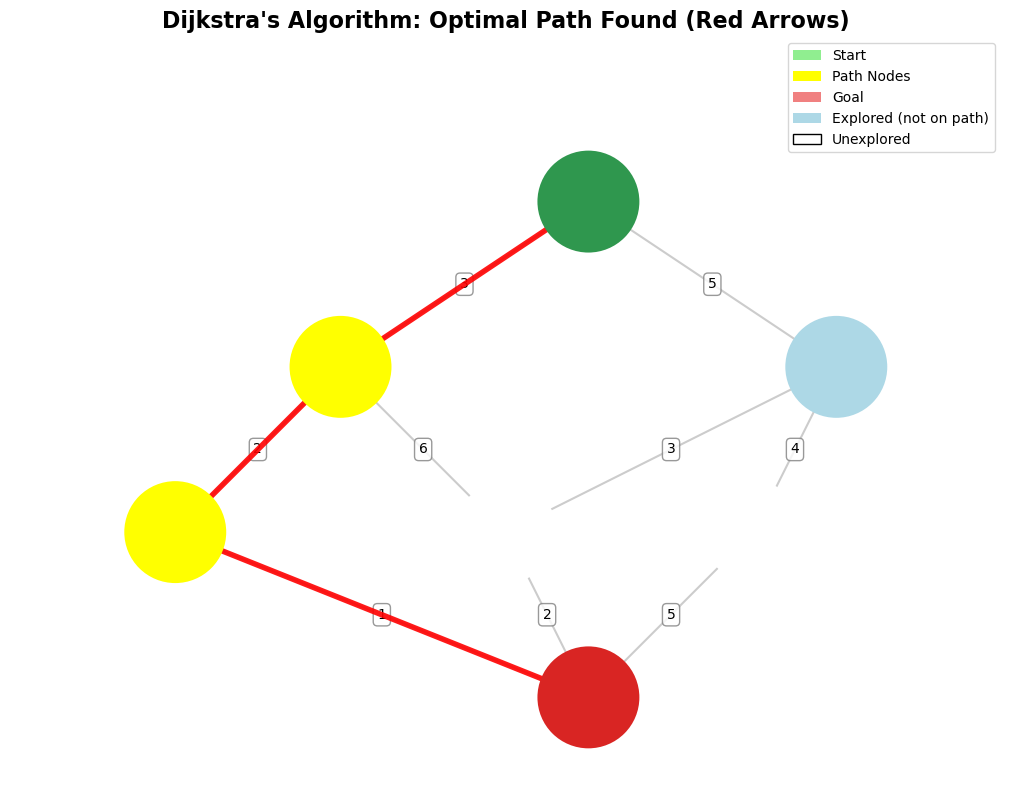

In [9]:
# Visualize Dijkstra's path found
def visualize_dijkstra_path(graph, path, exploration_order, edge_costs, title="Dijkstra's Algorithm Result"):
    """
    Visualize the path found by Dijkstra's algorithm.
    
    ⏰ WHEN to use: After Dijkstra completes - see the optimal path found
    💡 WHY use: Visual understanding helps verify algorithm works correctly, see path with costs!
    """
    fig, ax = plt.subplots(figsize=(12, 8))  # Create figure: Set size to 12 inches wide, 8 inches tall
    
    positions = {  # Define node positions: Fixed coordinates for each node (for consistent visualization)
        'A': (3, 3), 'B': (1.5, 2), 'C': (4.5, 2),  # Top row: A at center, B left, C right
        'D': (0.5, 1), 'E': (2.5, 1), 'F': (4, 1), 'G': (3, 0)  # Bottom rows: D, E, F, G at different levels
    }
    
    # Draw all edges with costs (weights)
    for node, neighbors in graph.items():  # Loop through all nodes: Iterate over every node in graph
        x1, y1 = positions[node]  # Get node position: Get (x, y) coordinates for current node
        for neighbor in neighbors:  # Loop through neighbors: Iterate over each neighbor of current node
            x2, y2 = positions[neighbor]  # Get neighbor position: Get (x, y) coordinates for neighbor node
            edge_key = (node, neighbor)  # Create edge key: Tuple for dictionary lookup
            cost = edge_costs.get(edge_key, 1)  # Get edge cost: Look up cost, default to 1
            
            # Draw edge (arrow)
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),  # Draw edge: Draw arrow from node to neighbor
                       arrowprops=dict(arrowstyle='->', color='gray', lw=1.5, alpha=0.4))  # Edge style: Gray arrow, thin, semi-transparent
            
            # Add cost label on edge
            mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2  # Calculate midpoint: Center of edge for label placement
            ax.text(mid_x, mid_y, str(cost), fontsize=10, ha='center', va='center',  # Add cost label: Display edge cost
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'))  # Label style: White box with border
    
    # Highlight the path found by Dijkstra in RED
    if path:  # Check if path exists: Only draw path if Dijkstra found a solution
        for i in range(len(path) - 1):  # Loop through path: Iterate over consecutive pairs in path
            x1, y1 = positions[path[i]]  # Get start position: Get coordinates of current node in path
            x2, y2 = positions[path[i+1]]  # Get end position: Get coordinates of next node in path
            edge_key = (path[i], path[i+1])  # Get edge key: Tuple for cost lookup
            cost = edge_costs.get(edge_key, 1)  # Get edge cost: Look up cost for this path edge
            
            ax.annotate('', xy=(x2, y2), xytext=(x1, y1),  # Draw path edge: Draw arrow showing path
                       arrowprops=dict(arrowstyle='->', color='red', lw=4, alpha=0.9))  # Path style: Red arrow, thick, opaque (stands out!)
    
    # Color nodes based on their status
    for node, (x, y) in positions.items():  # Loop through all nodes: Iterate over every node to color them appropriately
        if node in path:  # Check if on path: This node is part of the solution path
            # Nodes on the path: green to red gradient
            idx = path.index(node)  # Get position in path: Find where this node appears in path (0 = start, last = goal)
            color = plt.cm.Greens(0.7) if idx == 0 else (plt.cm.Reds(0.7) if idx == len(path)-1 else 'yellow')  # Choose color: Green for start, red for goal, yellow for intermediate
        elif node in exploration_order:  # Check if explored: This node was visited but not on path
            # Explored but not on path: light blue
            color = 'lightblue'  # Color: Light blue (explored but not solution)
        else:
            # Unexplored: white
            color = 'white'  # Color: White (not visited at all)
        
        circle = plt.Circle((x, y), 0.3, color=color, edgecolor='black', lw=2, zorder=5)  # Draw node: Create circle at (x, y), radius 0.3, colored, black border
        ax.add_patch(circle)  # Add to plot: Add circle to the visualization
        ax.text(x, y, node, ha='center', va='center', fontsize=14, fontweight='bold')  # Add label: Place node name in center of circle, bold text
    
    ax.set_xlim(-0.5, 5.5)  # Set x-axis limits: Define horizontal range of plot
    ax.set_ylim(-0.5, 4)  # Set y-axis limits: Define vertical range of plot
    ax.set_aspect('equal')  # Equal aspect ratio: Make circles look circular (not oval)
    ax.axis('off')  # Hide axes: Remove axis lines and labels (cleaner look)
    ax.set_title(title, fontsize=16, fontweight='bold')  # Add title: Bold text, large font
    
    # Add legend
    legend_elements = [  # Legend items: List of colored patches to explain node colors
        mpatches.Patch(facecolor='lightgreen', label='Start'),
        mpatches.Patch(facecolor='yellow', label='Path Nodes'),
        mpatches.Patch(facecolor='lightcoral', label='Goal'),
        mpatches.Patch(facecolor='lightblue', label='Explored (not on path)'),
        mpatches.Patch(facecolor='white', edgecolor='black', label='Unexplored')
    ]
    ax.legend(handles=legend_elements, loc='upper right')  # Show legend: Display legend in upper right corner
    
    plt.tight_layout()  # Adjust spacing: Prevent labels from overlapping or being cut off
    plt.show()  # Display plot: Show the visualization (MUST call this to see plot!)

# Visualize Dijkstra result
print("\n📊 Visualizing Dijkstra's result...")
if dijkstra_path:
    visualize_dijkstra_path(weighted_graph, dijkstra_path, dijkstra_order, edge_costs, 
                           "Dijkstra's Algorithm: Optimal Path Found (Red Arrows)")


## Part 5: BEFORE vs AFTER Comparison | المقارنة قبل وبعد

**BEFORE**: No systematic way to search - random exploration
**AFTER**: Three powerful algorithms with different strengths!

Let's compare them side-by-side:


📊 Comparing all three algorithms...
🔍 Starting BFS from A to G...
📋 Initial queue: [('A', ['A'])]
📋 Visited: []

Step 1: Processing node 'A'
   Path so far: A
   Exploring neighbors: ['B', 'C']
      Added 'B' to queue
      Added 'C' to queue
   Queue now: [('B', 2), ('C', 2)]
   Visited: ['A']

Step 2: Processing node 'B'
   Path so far: A -> B
   Exploring neighbors: ['D', 'E']
      Added 'D' to queue
      Added 'E' to queue
   Queue now: [('C', 2), ('D', 3), ('E', 3)]
   Visited: ['A', 'B']

Step 3: Processing node 'C'
   Path so far: A -> C
   Exploring neighbors: ['F']
      Added 'F' to queue
   Queue now: [('D', 3), ('E', 3), ('F', 3)]
   Visited: ['A', 'B', 'C']

Step 4: Processing node 'D'
   Path so far: A -> B -> D
   Exploring neighbors: []
   Queue now: [('E', 3), ('F', 3)]
   Visited: ['A', 'B', 'C', 'D']

Step 5: Processing node 'E'
   Path so far: A -> B -> E
   Exploring neighbors: ['G']
      Added 'G' to queue
   Queue now: [('F', 3), ('G', 4)]
   Visited: ['A', 

/var/folders/7n/l2c2z2x57871xg4f_0drsv1m0000gn/T/ipykernel_60750/1796306898.py:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), 0.3, color=node_color, edgecolor='black', lw=2)


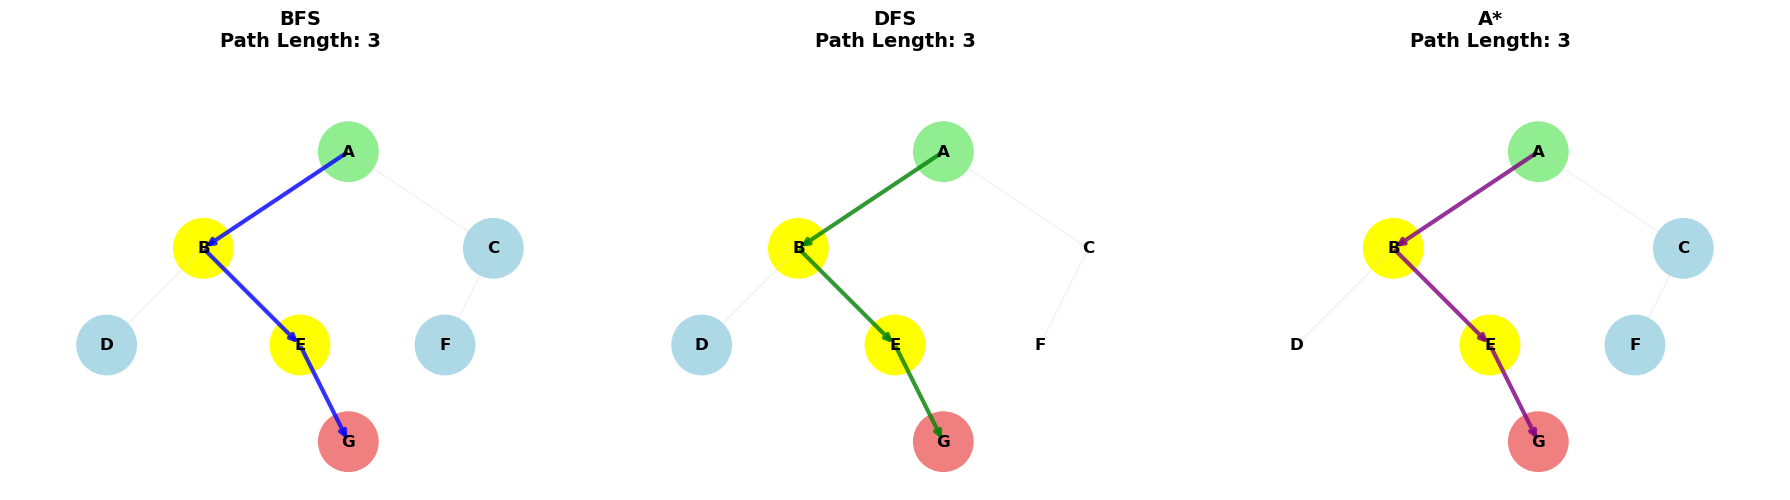


📊 ALGORITHM COMPARISON

Algorithm  Path Found   Path Length  Nodes Explored 
----------------------------------------------------------------------
BFS        Yes          3            7              
DFS        Yes          3            5              
A*         Yes          3            6              

✅ Key Differences:
   - BFS: Explores level by level, guarantees shortest path
   - DFS: Goes deep first, may not find shortest path
   - A*: Uses heuristic to find optimal path efficiently


In [10]:
# Compare all three algorithms side by side
def compare_algorithms(graph, start, goal):
    """
    Compare BFS, DFS, and A* algorithms.
    Shows their different exploration patterns.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    positions = {
        'A': (3, 3), 'B': (1.5, 2), 'C': (4.5, 2),
        'D': (0.5, 1), 'E': (2.5, 1), 'F': (4, 1), 'G': (3, 0)
    }
    
    # Get paths from each algorithm
    # BFS
    _, bfs_order = bfs_with_visualization(graph, start, goal)
    # DFS
    dfs_path, dfs_order = dfs_with_visualization(graph, start, goal)
    # A*
    astar_path, _, astar_order = astar_with_visualization(graph, start, goal)
    
    algorithms = [
        ("BFS", bfs_path, bfs_order, 'blue'),
        ("DFS", dfs_path, dfs_order, 'green'),
        ("A*", astar_path, astar_order, 'purple')
    ]
    
    for idx, (name, path, order, color) in enumerate(algorithms):
        ax = axes[idx]
        
        # Draw all edges
        for node, neighbors in graph.items():
            x1, y1 = positions[node]
            for neighbor in neighbors:
                x2, y2 = positions[neighbor]
                ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                           arrowprops=dict(arrowstyle='->', color='lightgray', lw=1, alpha=0.3))
        
        # Highlight path
        if path:
            for i in range(len(path) - 1):
                x1, y1 = positions[path[i]]
                x2, y2 = positions[path[i+1]]
                ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                           arrowprops=dict(arrowstyle='->', color=color, lw=3, alpha=0.8))
        
        # Color nodes
        for node, (x, y) in positions.items():
            if node in path if path else False:
                node_color = 'yellow' if node not in [start, goal] else ('lightgreen' if node == start else 'lightcoral')
            elif node in order:
                node_color = 'lightblue'
            else:
                node_color = 'white'
            
            circle = plt.Circle((x, y), 0.3, color=node_color, edgecolor='black', lw=2)
            ax.add_patch(circle)
            ax.text(x, y, node, ha='center', va='center', fontsize=12, fontweight='bold')
        
        ax.set_xlim(-0.5, 5.5)
        ax.set_ylim(-0.5, 4)
        ax.set_aspect('equal')
        ax.axis('off')
        path_length = len(path) - 1 if path else 0
        ax.set_title(f"{name}\nPath Length: {path_length}", fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print comparison table
    print("\n" + "=" * 70)
    print("📊 ALGORITHM COMPARISON")
    print("=" * 70)
    print(f"\n{'Algorithm':<10} {'Path Found':<12} {'Path Length':<12} {'Nodes Explored':<15}")
    print("-" * 70)
    print(f"{'BFS':<10} {'Yes':<12} {len(bfs_path)-1 if bfs_path else 'N/A':<12} {len(bfs_order):<15}")
    print(f"{'DFS':<10} {'Yes':<12} {len(dfs_path)-1 if dfs_path else 'N/A':<12} {len(dfs_order):<15}")
    print(f"{'A*':<10} {'Yes':<12} {len(astar_path)-1 if astar_path else 'N/A':<12} {len(astar_order):<15}")
    print("\n✅ Key Differences:")
    print("   - BFS: Explores level by level, guarantees shortest path")
    print("   - DFS: Goes deep first, may not find shortest path")
    print("   - A*: Uses heuristic to find optimal path efficiently")

print("\n📊 Comparing all three algorithms...")
compare_algorithms(graph, 'A', 'G')

## Part 7: Algorithm Complexity Analysis | تحليل تعقيد الخوارزميات

**Why Complexity Matters**: Understanding time and space complexity helps us choose the right algorithm for the problem!


In [11]:
# Complexity Analysis of Search Algorithms
# This shows WHY different algorithms are used in different situations

print("=" * 70)
print("📊 ALGORITHM COMPLEXITY ANALYSIS")
print("=" * 70)
print("\nUnderstanding complexity helps us choose the right algorithm!")
print()

complexities = {
    'BFS': {
        'time': 'O(V + E)', 'space': 'O(V)',
        'explanation': 'Visits each vertex and edge once, uses queue',
        'best_for': 'Unweighted graphs, shortest path (in edges)'
    },
    'DFS': {
        'time': 'O(V + E)', 'space': 'O(V)',
        'explanation': 'Visits each vertex and edge once, uses stack (recursion)',
        'best_for': 'Pathfinding, backtracking, memory-efficient'
    },
    'A*': {
        'time': 'O(b^d) worst case', 'space': 'O(b^d)',
        'explanation': 'Depends on heuristic quality, explores fewer nodes than BFS',
        'best_for': 'Weighted graphs with good heuristic'
    },
    "Dijkstra's": {
        'time': 'O((V + E) log V)', 'space': 'O(V)',
        'explanation': 'Uses priority queue, guarantees optimal path',
        'best_for': 'Weighted graphs, no heuristic needed'
    }
}

print("📋 Complexity Comparison:\n")
print(f"{'Algorithm':<12} {'Time Complexity':<20} {'Space Complexity':<18} {'Best For'}")
print("-" * 80)

for algo, info in complexities.items():
    print(f"{algo:<12} {info['time']:<20} {info['space']:<18} {info['best_for']}")

print("\n🔑 Key Insights:")
print("   • BFS: Best for unweighted shortest path")
print("   • DFS: Best when memory is limited")
print("   • A*: Best with good heuristic (fast)")
print("   • Dijkstra: Best for weighted graphs (guaranteed optimal)")
print()
print("📊 Where V = number of vertices, E = number of edges")
print("   b = branching factor, d = depth of solution")


📊 ALGORITHM COMPLEXITY ANALYSIS

Understanding complexity helps us choose the right algorithm!

📋 Complexity Comparison:

Algorithm    Time Complexity      Space Complexity   Best For
--------------------------------------------------------------------------------
BFS          O(V + E)             O(V)               Unweighted graphs, shortest path (in edges)
DFS          O(V + E)             O(V)               Pathfinding, backtracking, memory-efficient
A*           O(b^d) worst case    O(b^d)             Weighted graphs with good heuristic
Dijkstra's   O((V + E) log V)     O(V)               Weighted graphs, no heuristic needed

🔑 Key Insights:
   • BFS: Best for unweighted shortest path
   • DFS: Best when memory is limited
   • A*: Best with good heuristic (fast)
   • Dijkstra: Best for weighted graphs (guaranteed optimal)

📊 Where V = number of vertices, E = number of edges
   b = branching factor, d = depth of solution


In [12]:
# Real-World Applications of Search Algorithms

print("=" * 70)
print("🌍 REAL-WORLD APPLICATIONS OF SEARCH ALGORITHMS")
print("=" * 70)
print()

applications = {
    'BFS': [
        "🗺️  GPS Navigation: Finding shortest route (by number of turns)", "🌐 Web Crawling: Indexing web pages level by level",
        "🎮 Game AI: Pathfinding in games (e.g., finding path around obstacles)",
        "📡 Network Routing: Broadcasting messages in networks"
    ],
    'DFS': [
        "🔍 Puzzle Solving: Solving mazes, Sudoku (backtracking)",
        "🌳 Tree Traversal: File system navigation",
        "🔗 Topological Sorting: Task scheduling",
        "🎯 Cycle Detection: Detecting cycles in graphs"
    ],
    'A*': [
        "🚗 GPS Navigation: Optimal route finding (distance + time)",
        "🤖 Robotics: Path planning for robots",
        "🎮 Game AI: NPC movement in games (e.g., strategy games)",
        "🗺️  Map Applications: Google Maps route finding"
    ],
    "Dijkstra's": [
        "🌐 Network Routing: OSPF, IS-IS routing protocols",
        "🚗 GPS Systems: Finding shortest path considering traffic",
        "📡 Internet Routing: Packet routing in networks",
        "🚦 Traffic Management: Optimizing traffic flow"
    ]
}

for algo, apps in applications.items():
    print(f"📓 {algo} Applications:")
    for app in apps:
        print(f"   {app}")
    print()

print("💡 Key Takeaway:")
print("   Different algorithms solve different real-world problems!")
print("   Understanding when to use each algorithm is crucial!")


🌍 REAL-WORLD APPLICATIONS OF SEARCH ALGORITHMS

📓 BFS Applications:
   🗺️  GPS Navigation: Finding shortest route (by number of turns)
   🌐 Web Crawling: Indexing web pages level by level
   🎮 Game AI: Pathfinding in games (e.g., finding path around obstacles)
   📡 Network Routing: Broadcasting messages in networks

📓 DFS Applications:
   🔍 Puzzle Solving: Solving mazes, Sudoku (backtracking)
   🌳 Tree Traversal: File system navigation
   🔗 Topological Sorting: Task scheduling
   🎯 Cycle Detection: Detecting cycles in graphs

📓 A* Applications:
   🚗 GPS Navigation: Optimal route finding (distance + time)
   🤖 Robotics: Path planning for robots
   🎮 Game AI: NPC movement in games (e.g., strategy games)
   🗺️  Map Applications: Google Maps route finding

📓 Dijkstra's Applications:
   🌐 Network Routing: OSPF, IS-IS routing protocols
   🚗 GPS Systems: Finding shortest path considering traffic
   📡 Internet Routing: Packet routing in networks
   🚦 Traffic Management: Optimizing traffic flow

## Summary | ملخص

### What We Learned | ماذا تعلمنا:

**BEFORE this notebook**: 
- ❌ No systematic way to search graphs
- ❌ No understanding of different search strategies
- ❌ No visualization tools

**AFTER this notebook**:
- ✅ **BFS**: Level-by-level exploration, shortest path guaranteed
- ✅ **DFS**: Deep-first exploration, memory efficient
- ✅ **A***: Intelligent search using heuristics, optimal and efficient
- ✅ **Visualizations**: See exactly how each algorithm works!

### Python Concepts Used:
1. **Data Structures**: Lists, dictionaries, sets, deques
2. **Queue (FIFO)**: Used in BFS
3. **Stack (LIFO)**: Used in DFS (via recursion)
4. **Priority Queue**: Used in A* (via heapq)
5. **Visualization**: Matplotlib for graphs

### 🔗 How This Connects to Other Notebooks:

**What you learned here will be used in:**
- **Notebook 2: Knowledge Representation** - Uses graph concepts (nodes, edges) you learned here. Knowledge graphs are just graphs where nodes are entities and edges are relationships!

- **Notebook 4: Optimization Techniques** - Search algorithms are optimization problems! Finding the best path is like finding the optimal solution. A* uses optimization concepts (minimizing cost).

- **Notebook 5: AI Learning Models** - Understanding algorithms (like search) helps you understand how ML models work - they're also algorithms that search for patterns!

**Why this order?**
1. Search algorithms teach you **graph concepts** needed for knowledge representation
2. Search algorithms teach you **algorithmic thinking** needed for all AI
3. Search algorithms show you **problem-solving strategies** used throughout AI

### Real-World Applications:
- 🎮 **Game AI**: Pathfinding for NPCs (non-player characters) to navigate game worlds
- 🤖 **Robotics**: Navigation systems for robots to find paths while avoiding obstacles
- 🗺️ **GPS Navigation**: Finding optimal routes between locations
- 🌐 **Web Crawling**: Systematically exploring websites and links
- 🔍 **Puzzle Solving**: Finding solutions to problems like Rubik's cube, mazes, and puzzles
- 📊 **Network Analysis**: Finding shortest paths in social networks, communication networks

### Key Takeaways:
1. **Different algorithms for different needs**: BFS for shortest path, DFS for memory efficiency, A* for intelligent search
2. **Graph representation matters**: How you represent the graph affects algorithm efficiency
3. **Visualization helps understanding**: Seeing algorithms work makes concepts clearer
4. **Foundation for AI**: Search algorithms are fundamental - many AI techniques build on these concepts

## Part 9: Practice Exercises | التمارين العملية

**The Story**: Now that we understand the algorithms, let's practice! Practice helps us truly master the concepts.

**BEFORE**: We watched algorithms work, but haven't tried them ourselves.
**AFTER**: We'll solve problems using what we learned - this cements our understanding!


In [13]:
# Practice Exercise: Solve a Maze Using Different Algorithms
# This exercise helps you understand how each algorithm works differently!

def create_practice_maze():
    """
    Create a practice maze for solving.
    
    Problem: Find path from start to goal in this maze.
    Solution: Use different search algorithms and compare!
    """
    maze_graph = {
        (0, 0): [(0, 1), (1, 0)],  # Start position
        (0, 1): [(0, 0), (0, 2)],
        (0, 2): [(0, 1), (1, 2)],
        (1, 0): [(0, 0), (2, 0)],
        (1, 2): [(0, 2), (2, 2)],
        (2, 0): [(1, 0), (2, 1)],
        (2, 1): [(2, 0), (2, 2), (3, 1)],
        (2, 2): [(1, 2), (2, 1), (3, 2)],
        (3, 1): [(2, 1), (3, 2)],
        (3, 2): [(2, 2), (3, 1), (3, 3)],
        (3, 3): [(3, 2)]  # Goal position
    }
    return maze_graph

print("=" * 70)
print("🎯 PRACTICE EXERCISE: Maze Solving")
print("=" * 70)
print("\n📝 Problem: Solve the maze using different algorithms")
print("   Start: (0, 0)")
print("   Goal: (3, 3)")
print()

maze = create_practice_maze()

# Define simple search functions for practice exercise
# These are simplified versions of the full algorithms we learned earlier

def bfs(graph, start, goal):
    """Simple BFS implementation for practice exercise"""
    from collections import deque
    queue = deque([(start, [start])])
    visited = set()
    
    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path
        if current not in visited:
            visited.add(current)
            for neighbor in graph.get(current, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    return None

def dfs(graph, start, goal, visited=None, path=None):
    """Simple DFS implementation for practice exercise"""
    if visited is None:
        visited = set()
    if path is None:
        path = []
    
    visited.add(start)
    path = path + [start]
    
    if start == goal:
        return path, visited
    
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            result, _ = dfs(graph, neighbor, goal, visited, path)
            if result:
                return result, visited
    
    return None, visited

def astar(graph, start, goal):
    """Simple A* implementation for practice exercise"""
    import heapq
    
    def heuristic(node, goal):
        """Manhattan distance heuristic for grid-based maze"""
        return abs(node[0] - goal[0]) + abs(node[1] - goal[1])
    
    open_set = [(0, 0, start, [start])]
    visited = set()
    g_scores = {start: 0}
    
    while open_set:
        f_score, g_score, current, path = heapq.heappop(open_set)
        
        if current == goal:
            return path, visited
        
        if current in visited:
            continue
        
        visited.add(current)
        
        for neighbor in graph.get(current, []):
            if neighbor in visited:
                continue
            
            tentative_g = g_score + 1  # Edge cost = 1 for all edges
            h_score = heuristic(neighbor, goal)
            f_score = tentative_g + h_score
            
            if neighbor not in g_scores or tentative_g < g_scores[neighbor]:
                g_scores[neighbor] = tentative_g
                heapq.heappush(open_set, (f_score, tentative_g, neighbor, path + [neighbor]))
    
    return None, visited

# Try BFS
print("🔍 Using BFS:")
bfs_path = bfs(maze, (0, 0), (3, 3))
print(f"   Path: {bfs_path}")
print(f"   Path length: {len(bfs_path) - 1} steps")

# Try DFS
print("\n🔍 Using DFS:")
dfs_path, _ = dfs(maze, (0, 0), (3, 3))
print(f"   Path: {dfs_path}")
print(f"   Path length: {len(dfs_path) - 1} steps")

# Try A*
print("\n🔍 Using A*:")
astar_path, _ = astar(maze, (0, 0), (3, 3))
print(f"   Path: {astar_path}")
print(f"   Path length: {len(astar_path) - 1} steps")

print("\n📊 Comparison:")
print(f"   BFS found path of length: {len(bfs_path) - 1 if bfs_path else 'N/A'}")
print(f"   DFS found path of length: {len(dfs_path) - 1 if dfs_path else 'N/A'}")
print(f"   A* found path of length: {len(astar_path) - 1 if astar_path else 'N/A'}")
print("\n💡 Practice Questions:")
print("   1. Why might paths differ between algorithms?")
print("   2. Which algorithm always finds the shortest path (in edges)?")
print("   3. Which algorithm is most memory-efficient?")


🎯 PRACTICE EXERCISE: Maze Solving

📝 Problem: Solve the maze using different algorithms
   Start: (0, 0)
   Goal: (3, 3)

🔍 Using BFS:
   Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3)]
   Path length: 6 steps

🔍 Using DFS:
   Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (3, 1), (3, 2), (3, 3)]
   Path length: 8 steps

🔍 Using A*:
   Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3)]
   Path length: 6 steps

📊 Comparison:
   BFS found path of length: 6
   DFS found path of length: 8
   A* found path of length: 6

💡 Practice Questions:
   1. Why might paths differ between algorithms?
   2. Which algorithm always finds the shortest path (in edges)?
   3. Which algorithm is most memory-efficient?
